In [10]:
import pandas as pd
import numpy as np
import itertools

from nltk import agreement

from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats import inter_rater as irr
from statsmodels.stats.inter_rater import fleiss_kappa

import seaborn as sns
import matplotlib.pyplot as plt

## Import manually annotated data

In [11]:
df = pd.read_csv("Annotation-data-test.csv")

In [12]:
df = df.drop('Unnamed: 0', 1)

C:\Users\anton\AppData\Local\Temp/ipykernel_19096/3812631323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)


In [13]:
df['comment_text'] = df['comment.text']

In [14]:
df = df.drop(['comment.text'], axis = 1)

In [15]:
df = df.dropna()

In [16]:
df = df.drop(['id', 'date', 'phaseType', 'Machine_Translation', 'toxicity', 'severe_toxicity'], axis = 1)

In [17]:
df

,post.nr,n,lab_toxic,lab_undetermined,lab_not_toxic,comment_text
0,1,51,0.0,0.0,1.0,fick just samtal att en lastbil kört över mass...
1,2,116,0.0,0.0,1.0,andra trådar kopplade till terrorattentatet på...
2,3,15,0.0,0.0,1.0,har även jag hört från en på plats nya spänna...
3,4,17,0.0,0.0,1.0,enligt nyhetsflash från aftonbladet har en las...
4,5,1,0.0,0.0,1.0,terrorattack
...,...,...,...,...,...,...
5395,5439,53,0.0,0.0,1.0,för att inte bli identifierad alls under själv...
5396,5440,60,0.0,0.0,1.0,har någon några uppgifter hurvida det var en s...
5397,5441,42,0.0,0.0,1.0,varför gm hade rånarluva vet jag inte men jag...
5398,5442,30,0.0,0.0,1.0,jag återgav vad folk som själva påstår sig kör...


## Randomly sample a set of 600 comments from manually annotated data

In [18]:
df_reli = df.sample(n=600)

In [19]:
df_reli['lab_toxic'].value_counts()

0.0    530
1.0     70
Name: lab_toxic, dtype: int64

In [20]:
df_reli['lab_undetermined'].value_counts()

0.0    577
1.0     23
Name: lab_undetermined, dtype: int64

In [21]:
df_reli['lab_not_toxic'].value_counts()

1.0    505
0.0     95
Name: lab_not_toxic, dtype: int64

In [22]:
df_reli = df_reli[['post.nr', 'n', 'comment_text', 'lab_toxic', 'lab_undetermined', 'lab_not_toxic']]

In [23]:
df_reli

,post.nr,n,comment_text,lab_toxic,lab_undetermined,lab_not_toxic
1341,1349,74,jag har en obehaglig känsla av att polisen int...,1.0,0.0,0.0
5256,5298,17,man ser bild på killen som grips i vårberg ko...,0.0,0.0,1.0
2784,2806,86,en tjej i en grupp för föräldrar som bär u bär...,0.0,0.0,1.0
3669,3699,20,västeuropa ja kanske dock var en uzbek inbla...,0.0,0.0,1.0
4612,4648,108,nazistdåd ett ord som svensk media gillar at...,0.0,0.0,1.0
...,...,...,...,...,...,...
4284,4316,51,och det blev en attans smäll när lastbilen kör...,0.0,0.0,1.0
3046,3070,38,sedan gick han förvirrat i en butik ute i märs...,0.0,0.0,1.0
3371,3398,11,självklart kommer polis att kalla in honom va...,0.0,0.0,1.0
3363,3390,103,om det verkligen skulle finnas en väska med sp...,0.0,0.0,1.0


In [24]:
df_reli_c = df_reli

In [25]:
df_reli = df_reli.drop(['lab_toxic', 'lab_undetermined', 'lab_not_toxic'], axis = 1)

In [26]:
df_reli["lab_toxic"] = ""

In [27]:
df_reli["lab_undetermined"] = ""

In [28]:
df_reli["lab_not_toxic"] = ""

In [29]:
df_reli

,post.nr,n,comment_text,lab_toxic,lab_undetermined,lab_not_toxic
1341,1349,74,jag har en obehaglig känsla av att polisen int...,,,
5256,5298,17,man ser bild på killen som grips i vårberg ko...,,,
2784,2806,86,en tjej i en grupp för föräldrar som bär u bär...,,,
3669,3699,20,västeuropa ja kanske dock var en uzbek inbla...,,,
4612,4648,108,nazistdåd ett ord som svensk media gillar at...,,,
...,...,...,...,...,...,...
4284,4316,51,och det blev en attans smäll när lastbilen kör...,,,
3046,3070,38,sedan gick han förvirrat i en butik ute i märs...,,,
3371,3398,11,självklart kommer polis att kalla in honom va...,,,
3363,3390,103,om det verkligen skulle finnas en väska med sp...,,,


## Export data >> sending file to 2 other ppl to check annotator agreement

In [30]:
df_reli.to_csv('annotation-agreement', index = True, encoding = 'utf-8-sig')

## Import data that was received from the 2 other ppl

In [31]:
df_A2 = pd.read_excel("annotation-agreement-A2.xlsx") #Person A

In [32]:
df_A3 = pd.read_excel("annotation-agreement-A3.xlsx") #Person B

In [33]:
df_A1 = df.loc[df['post.nr'].isin(df_A2['post.nr'])] #My own annotations

In [34]:
df_A1 = df_A1.set_index('post.nr')
df_A1 = df_A1.reindex(index=df_A2['post.nr'])
df_A1 = df_A1.reset_index()

In [35]:
df_A1 = df_A1.reindex(columns=['post.nr','n','comment_text','lab_toxic','lab_undetermined','lab_not_toxic'])

In [36]:
df_A3 = df_A3.dropna()

In [37]:
df_A2 = df_A2.drop('Unnamed: 0', 1)
df_A3 = df_A3.drop('Unnamed: 0', 1)

C:\Users\anton\AppData\Local\Temp/ipykernel_19096/3422084319.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_A2 = df_A2.drop('Unnamed: 0', 1)
C:\Users\anton\AppData\Local\Temp/ipykernel_19096/3422084319.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_A3 = df_A3.drop('Unnamed: 0', 1)


In [38]:
df_A1

,post.nr,n,comment_text,lab_toxic,lab_undetermined,lab_not_toxic
0,2423,44,och det är en jävla tur att han var inkompeten...,1.0,0.0,0.0
1,651,102,om det är ett terrordåd så är det ändå många l...,0.0,0.0,1.0
2,3571,15,det kan ligga mycket i det rent krasst borde ...,0.0,0.0,1.0
3,316,8,de som intervjuades kan ju vara inrikesfödda o...,0.0,0.0,1.0
4,919,5,vad ska militären göra då,0.0,0.0,1.0
...,...,...,...,...,...,...
595,911,19,hur blir det om jag tänkt pubba på söder ikväl...,0.0,0.0,1.0
596,1202,7,minst tre döda kan nog bli fler,0.0,0.0,1.0
597,2622,26,lite creepy gå in på hitta se och element gat...,0.0,0.0,1.0
598,727,23,löjligt hur kassa dem här terroristerna är ha...,1.0,0.0,0.0


In [39]:
df_A1.loc[df_A1['post.nr'] == 1186, ['lab_not_toxic']] = [1] #I had to annotate as-we-go for this row because I had apparantly missed it

In [40]:
df_A2 

,post.nr,n,comment_text,lab_toxic,lab_undetermined,lab_not_toxic
0,2423,44,och det är en jävla tur att han var inkompeten...,1,0,0
1,651,102,om det är ett terrordåd så är det ändå många l...,0,0,1
2,3571,15,det kan ligga mycket i det rent krasst borde ...,0,0,1
3,316,8,de som intervjuades kan ju vara inrikesfödda o...,0,0,1
4,919,5,vad ska militären göra då,0,0,1
...,...,...,...,...,...,...
595,911,19,hur blir det om jag tänkt pubba på söder ikväl...,0,0,1
596,1202,7,minst tre döda kan nog bli fler,0,0,1
597,2622,26,lite creepy gå in på hitta se och element gat...,0,0,1
598,727,23,löjligt hur kassa dem här terroristerna är ha...,1,0,0


In [41]:
df_A3 

,post.nr,n,comment_text,lab_toxic,lab_undetermined,lab_not_toxic
0,2423.0,44.0,och det är en jävla tur att han var inkompeten...,1.0,0.0,0.0
1,651.0,102.0,om det är ett terrordåd så är det ändå många l...,0.0,0.0,1.0
2,3571.0,15.0,det kan ligga mycket i det rent krasst borde ...,1.0,0.0,0.0
3,316.0,8.0,de som intervjuades kan ju vara inrikesfödda o...,0.0,0.0,1.0
4,919.0,5.0,vad ska militären göra då,0.0,0.0,1.0
...,...,...,...,...,...,...
595,911.0,19.0,hur blir det om jag tänkt pubba på söder ikväl...,0.0,0.0,1.0
596,1202.0,7.0,minst tre döda kan nog bli fler,0.0,0.0,1.0
597,2622.0,26.0,lite creepy gå in på hitta se och element gat...,0.0,0.0,1.0
598,727.0,23.0,löjligt hur kassa dem här terroristerna är ha...,1.0,0.0,0.0


In [42]:
cols = df_A1.iloc[:, 3:6]

In [43]:
def get_labels(row):
    for col in cols:
        if row[col] == 1:
            return col

df_A1['Labels'] = df_A1.apply(get_labels, axis=1)
df_A2['Labels'] = df_A2.apply(get_labels, axis=1)
df_A3['Labels'] = df_A3.apply(get_labels, axis=1)

In [44]:
df_A1 = df_A1.drop(['lab_toxic', 'lab_undetermined', 'lab_not_toxic'], axis = 1)
df_A2 = df_A2.drop(['lab_toxic', 'lab_undetermined', 'lab_not_toxic'], axis = 1)
df_A3 = df_A3.drop(['lab_toxic', 'lab_undetermined', 'lab_not_toxic'], axis = 1)

In [45]:
df_A1[415:430]

,post.nr,n,comment_text,Labels
415,4518,26,har svårt att fatta att kroppar bara kan gå it...,lab_not_toxic
416,163,10,trodde aldrig att det skulle hända här liv...,lab_not_toxic
417,1181,29,du är helt dumi huvudet om du tror att idlamis...,lab_toxic
418,3204,63,nej de ska åtala dom som de kan bevisa att de...,lab_not_toxic
419,3741,28,lastbil med sprängmedel kraschar in i butiken...,lab_not_toxic
420,4658,44,vad är det du inte förstår det är ett mirakel...,lab_toxic
421,1477,42,men för i helvete trollar du ditt svin har du...,lab_toxic
422,1772,28,presskonferens med vår statsminister angåend...,lab_toxic
423,1294,67,en del polisiär bevakning kommer det säkert va...,lab_not_toxic
424,209,6,verkar inte vara en trevlig syn,lab_not_toxic


In [46]:
df_A2[415:430]

,post.nr,n,comment_text,Labels
415,4518,26,har svårt att fatta att kroppar bara kan gå it...,lab_not_toxic
416,163,10,trodde aldrig att det skulle hända här liv...,lab_not_toxic
417,1181,29,du är helt dumi huvudet om du tror att idlamis...,lab_toxic
418,3204,63,nej de ska åtala dom som de kan bevisa att de...,lab_not_toxic
419,3741,28,lastbil med sprängmedel kraschar in i butiken...,lab_not_toxic
420,4658,44,vad är det du inte förstår det är ett mirakel...,lab_toxic
421,1477,42,men för i helvete trollar du ditt svin har du...,lab_toxic
422,1772,28,presskonferens med vår statsminister angåend...,lab_toxic
423,1294,67,en del polisiär bevakning kommer det säkert va...,lab_not_toxic
424,209,6,verkar inte vara en trevlig syn,lab_not_toxic


In [47]:
df_A3[415:430]

,post.nr,n,comment_text,Labels
415,4518.0,26.0,har svårt att fatta att kroppar bara kan gå it...,lab_not_toxic
416,163.0,10.0,trodde aldrig att det skulle hända här liv...,lab_not_toxic
417,1181.0,29.0,du är helt dumi huvudet om du tror att idlamis...,lab_toxic
418,3204.0,63.0,nej de ska åtala dom som de kan bevisa att de...,lab_not_toxic
419,3741.0,28.0,lastbil med sprängmedel kraschar in i butiken...,lab_not_toxic
420,4658.0,44.0,vad är det du inte förstår det är ett mirakel...,lab_toxic
421,1477.0,42.0,men för i helvete trollar du ditt svin har du...,lab_toxic
422,1772.0,28.0,presskonferens med vår statsminister angåend...,lab_undetermined
423,1294.0,67.0,en del polisiär bevakning kommer det säkert va...,lab_not_toxic
424,209.0,6.0,verkar inte vara en trevlig syn,lab_not_toxic


In [48]:
is_NaN = df_A1.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_A1[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [post.nr, n, comment_text, Labels]
Index: []


In [49]:
is_NaN = df_A2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_A2[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [post.nr, n, comment_text, Labels]
Index: []


In [50]:
is_NaN = df_A3.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_A2[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [post.nr, n, comment_text, Labels]
Index: []


In [51]:
le = LabelEncoder()
df_A1['Labels'] = le.fit_transform(df_A1['Labels'])
df_A2['Labels'] = le.fit_transform(df_A2['Labels'])
df_A3['Labels'] = le.fit_transform(df_A3['Labels'])

In [52]:
df_A1['Labels'].value_counts()

0    519
1     63
2     18
Name: Labels, dtype: int64

In [53]:
df_A2['Labels'].value_counts()

0    518
1     52
2     30
Name: Labels, dtype: int64

In [54]:
df_A3['Labels'].value_counts()

0    472
1     85
2     43
Name: Labels, dtype: int64

In [55]:
labeler1 = df_A1['Labels']
labeler2 = df_A2['Labels']
labeler3 = df_A3['Labels']

In [56]:
labeler1

0      1
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    1
599    1
Name: Labels, Length: 600, dtype: int32

In [57]:
labeler2

0      1
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    1
599    1
Name: Labels, Length: 600, dtype: int32

In [58]:
labeler3

0      1
1      0
2      1
3      0
4      0
      ..
595    0
596    0
597    0
598    1
599    1
Name: Labels, Length: 600, dtype: int32

In [59]:
labelers = [labeler1, labeler2, labeler3]

In [60]:
data = np.zeros((len(labelers), len(labelers)))

In [61]:
for j, k in list(itertools.combinations(range(len(labelers)), r=2)):
    data[j, k] = cohen_kappa_score(labelers[j], labelers[k])

## Cohen's Kappa - no good results

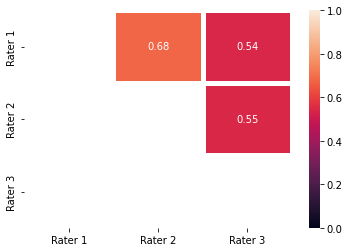

In [62]:
sns.heatmap(
    data, 
    mask=np.tri(len(labelers)),
    annot=True, linewidths=5,
    vmin=0, vmax=1,
    xticklabels=[f"Rater {k + 1}" for k in range(len(labelers))],
    yticklabels=[f"Rater {k + 1}" for k in range(len(labelers))],
)
plt.show()

## Fleiss Kappa

In [63]:
taskdata=[[0,str(i),str(labeler1[i])] for i in range(0,len(labeler1))]+[[1,str(i),str(labeler2[i])] for i in range(0,len(labeler2))]+[[2,str(i),str(labeler3[i])] for i in range(0,len(labeler3))]
ratingtask = agreement.AnnotationTask(data=taskdata)
print("fleiss " + str(ratingtask.multi_kappa()))

fleiss 0.5824061639202849
